In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import tqdm
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import wrf

In [2]:
def preprocess(f):
    
    time_strs = [str(i.values)[1:].replace("_"," ") for i in f.Times]
    time_datetime = pd.to_datetime(time_strs)
    f = f.assign(Time=time_datetime)
    
    return f
    

In [3]:
f = xr.open_mfdataset("/g/data/w40/ab4502/WRF_simulations/tasman_d04_20231015_20231016_ramssa_nov23_shortlead/sfcwind_d04_2023-10-16*",
                     decode_times=False,concat_dim="Time",combine="nested",preprocess=preprocess).sel(Time=slice("2023-10-16 01:30","2023-10-16 05:30"))
times = f.Time.values
wrflist = Dataset("/g/data/w40/ab4502/WRF_simulations/tasman_d04_20231015_20231016_ramssa_nov23_shortlead/sfcwind_d04_2023-10-15_15:00:00")

0.3.0


In [112]:
transects = xr.open_dataset("/g/data/w40/ab4502/WRF_simulations/transects/tasman_d04_20231015_20231016_ramssa_nov23_shortlead_02:30:00.nc")
point_lats = transects.sel(cross_line_idx=25,method="nearest").xy_lat.values
point_lons = transects.sel(cross_line_idx=25,method="nearest").xy_lon.values

x,y = wrf.ll_to_xy(wrflist,point_lats,point_lons).values
target_x = xr.DataArray(x,dims="points")
target_y = xr.DataArray(y,dims="points")
f_point = f.sel(south_north=target_y,west_east=target_x)

In [113]:
f_point["ws"] = np.sqrt(np.square(f_point["U10"]) + np.square(f_point["V10"]))
f_point["wdir"] = (((90-np.rad2deg(np.arctan2(-f_point["V10"],-f_point["U10"]))) + 180) % 360) - 180
f_point = f_point.persist()

(100100.0, 100800.0)

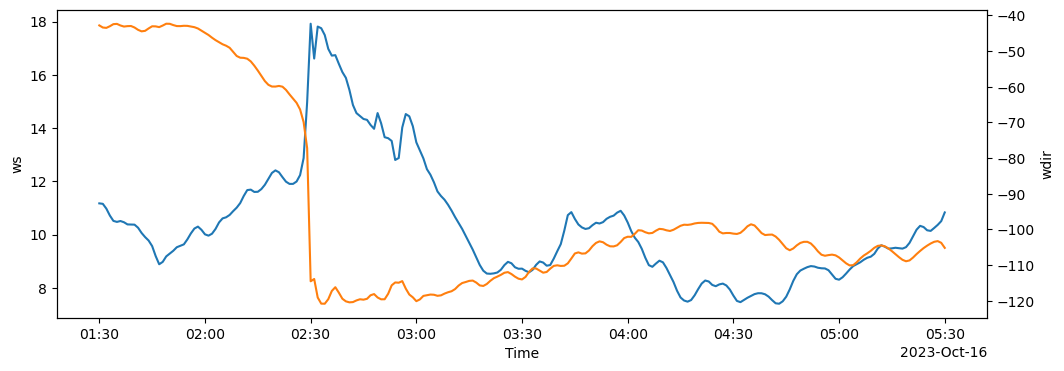

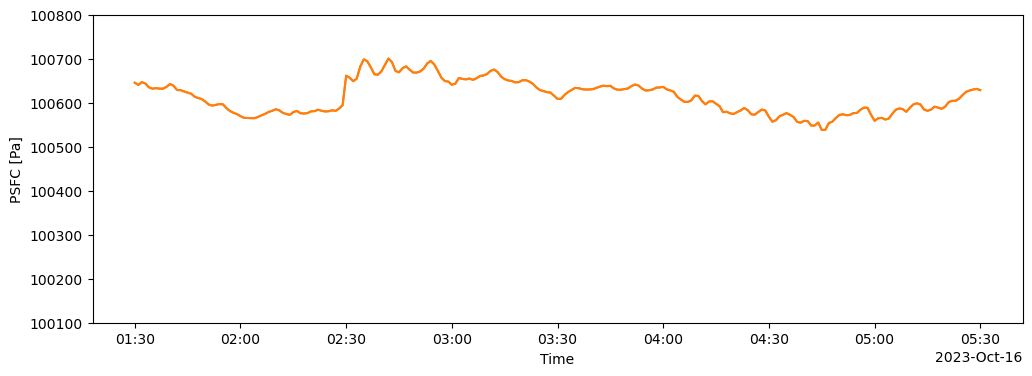

In [136]:
p=4

plt.figure(figsize=[12,4])
f_point.isel(points=p).ws.plot()
plt.gca().twinx()
f_point.isel(points=p).wdir.plot(color="tab:orange")

plt.figure(figsize=[12,4])
f_point.isel(points=p).PSFC.plot(color="tab:orange")
f_point.isel(points=p).PSFC.plot(color="tab:orange")
plt.ylim([100100,100800])

(100100.0, 100800.0)

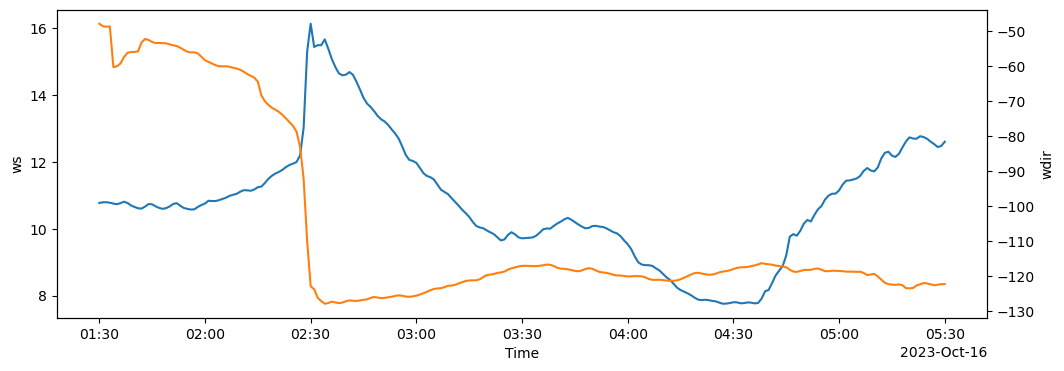

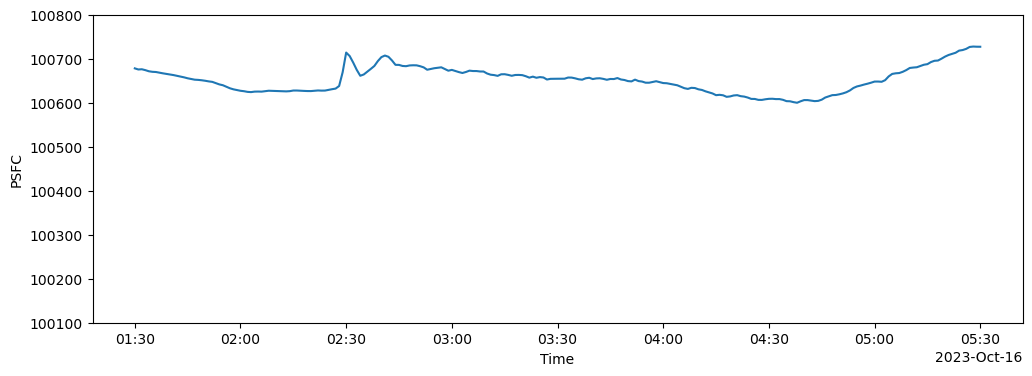

In [127]:
plt.figure(figsize=[12,4])
f_point.ws.mean("points").plot()
plt.gca().twinx()
f_point.wdir.mean("points").plot(color="tab:orange")

plt.figure(figsize=[12,4])
f_point.PSFC.mean("points").plot()
plt.ylim([100100,100800])

(100100.0, 100800.0)

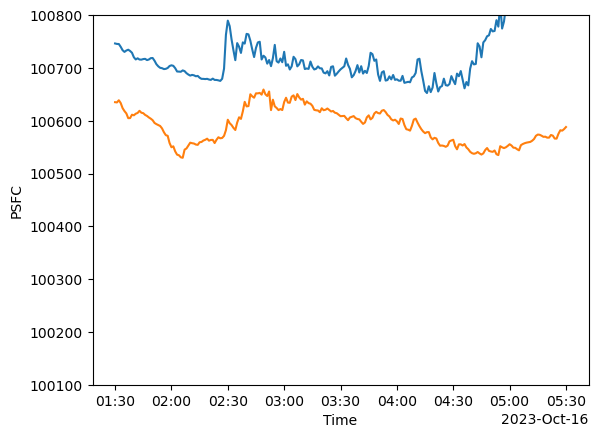

In [139]:
f_point.PSFC.max("points").plot()
f_point.PSFC.min("points").plot()
plt.ylim([100100,100800])